<h2 style = 'color: orange'> Projeto Sprint 4 - Megaline (empresa de telecomunicações) </h2>

<h3 style = 'color: orange'> 1.1  Inicialização</h3>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# Importando Libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style = 'color: orange'> 1.2  Carregue os dados</h3>

In [3]:
users = pd.read_csv('megaline_users.csv')
calls = pd.read_csv('megaline_calls.csv')
messages = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
plans = pd.read_csv('megaline_plans.csv')

<h3 style = 'color: orange'>1.3  Prepare os dados</h3>

<p style = 'color: orange'>1.4 DataFrame 'plans'</p>

In [4]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<p style = 'color: #40cfff'>Vou passar a informação para GB.</p>

In [6]:
plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [7]:
plans.rename(columns= {'mb_per_month_included' : 'gb_per_month_included'}, inplace= True)
plans.columns

Index(['messages_included', 'gb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

<p style = 'color: orange'>1.7 DataFrame 'users'</p>

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<p style = 'color: #40cfff'>A primeira impressão é que apenas devemos substituir os NaN da coluna ''churn_date' por alguma string informativa.</p>

<p style = 'color: #40cfff'>Vou alterar o nome da coluna 'plan' para 'plan_name' assim tera o mesmo nome, para a mesma informação do DataFrame 'users'.</p>

<p style = 'color: #40cfff'>Porém verificaremos se há alguma linha duplicada e adicionarei uma coluna 'churned' com valores 1 (para clientes que cancelaram seu plano) e 0 (para clientes ativos)</p>

In [10]:
users.duplicated().sum()

0

In [11]:
users['churn_date'].fillna('cliente ativo', inplace=True)

In [12]:
users['churn_date'].isna().sum()

0

In [13]:
users.rename(columns= {'plan': 'plan_name'}, inplace=True)
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan_name', 'churn_date'],
      dtype='object')

In [14]:
def churned_clients (info):
    if info == 'cliente ativo':
        return 0
    else:
        return 1
    
users['churned'] = users['churn_date'].apply(churned_clients)

users['churned'].value_counts()

churned
0    466
1     34
Name: count, dtype: int64

In [15]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,churned
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,cliente ativo,0
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,cliente ativo,0
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,cliente ativo,0
293,1293,Lanny,Nolan,23,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-13,surf,cliente ativo,0
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,cliente ativo,0


<p style = 'color: orange'>1.8 DataFrame 'calls'</p>

In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [18]:
calls.sample(5)

,id,user_id,call_date,duration
100210,1359_73,1359,2018-11-12,3.69
55538,1199_110,1199,2018-10-10,3.78
83434,1302_208,1302,2018-10-07,13.60
83531,1304_274,1304,2018-12-14,14.30
88680,1324_736,1324,2018-07-27,4.38


<p style = 'color: #40cfff'>Ao visualizar os dados, surge a ideia de que a coluna 'id' poderia ser do tipo 'INT'. Porém, ao analizar percebi que a estrutura é composta por duas informações, onde a primeira é o 'user_id'. Por isso ela deve permanecer como está. </p>

<p style = 'color: #40cfff'>Para poder chegar às conclusão necessárias será preciso desde já arredondar a duração das chamadas para cima.</p>

<p style = 'color: #40cfff'>Porém o primeiro passo será verificar se existem dados duplicados.</p>

<p style = 'color: #40cfff'>Incluir colunas para filtragem de data (apenas dia e mês, já que todos os dados são do mesmo ano)</p>

In [19]:
calls.duplicated().sum()

0

In [20]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

In [22]:
calls['month_contract'] = calls['call_date'].dt.month
calls['day_contract'] = calls['call_date'].dt.day

In [23]:
calls.head()

,id,user_id,call_date,duration,month_contract,day_contract
0,1000_93,1000,2018-12-27,9.0,12,27
1,1000_145,1000,2018-12-27,14.0,12,27
2,1000_247,1000,2018-12-27,15.0,12,27
3,1000_309,1000,2018-12-28,6.0,12,28
4,1000_380,1000,2018-12-30,5.0,12,30


<p style = 'color: orange'>1.9 DataFrame 'messages'</p>

In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<p style = 'color: #40cfff'>Vou incluir também colunas para filtragem de data (mes e dia), após a verificação de linhas duplicadas.</p>

In [26]:
messages.duplicated().sum()

0

In [27]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

In [28]:
messages['month_contract'] = messages['message_date'].dt.month
messages['day_contract'] = messages['message_date'].dt.day

In [29]:
messages.sample(5)

,id,user_id,message_date,month_contract,day_contract
11439,1077_710,1077,2018-10-22,10,22
61878,1385_342,1385,2018-04-21,4,21
66699,1434_232,1434,2018-11-21,11,21
14295,1098_320,1098,2018-09-30,9,30
37559,1249_13,1249,2018-10-12,10,12


<p style = 'color: orange'>1.10 DataFrame 'internet'</p>

In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<p style = 'color: #40cfff'>Vou incluir também colunas para filtragem de data (mes e dia), após a verificação de linhas duplicadas.</p>

In [32]:
internet.duplicated().sum()

0

In [33]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')

In [34]:
internet['month_contract'] = internet['session_date'].dt.month
internet['day_contract'] = internet['session_date'].dt.day

In [35]:
internet.sample(5)

,id,user_id,session_date,mb_used,month_contract,day_contract
34454,1156_51,1156,2018-04-30,379.61,4,30
40579,1182_270,1182,2018-09-10,183.72,9,10
63586,1292_290,1292,2018-11-06,352.49,11,6
72477,1336_550,1336,2018-07-21,790.71,7,21
27559,1127_270,1127,2018-10-06,0.00,10,6


<h3 style = 'color: orange'>1.11  Estude as condições dos planos</h3>


Observação: A Megaline arredonda segundos para minutos e megabytes para gigabytes. Para chamadas, cada chamada individual é arredondada para cima: mesmo que uma chamada tenha durado apenas um segundo, um minuto será contado. Para tráfego da web, sessões individuais da web não são arredondadas para cima. Ao invés disso, o total do mês é arredondado para cima. Se alguém usar 1.025 megabytes no mês, a cobrança será de 2 gigabytes.
Aqui está uma descrição dos planos:



In [36]:
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<h3 style = 'color: orange'>1.12  Agregue os dados por usuário</h3>

In [37]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
calls.head(3)

,id,user_id,call_date,duration,month_contract,day_contract
0,1000_93,1000,2018-12-27,9.0,12,27
1,1000_145,1000,2018-12-27,14.0,12,27
2,1000_247,1000,2018-12-27,15.0,12,27


In [38]:
calls_per_month = calls.groupby(['user_id','month_contract'])['id'].count().reset_index()
calls_per_month

,user_id,month_contract,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


<p style = 'color: #40cfff'>Deixando o nome das colunas mais explicativos:</p>

In [39]:
calls_per_month.rename(columns= {'id': 'calls_count'}, inplace=True)
calls_per_month.columns

Index(['user_id', 'month_contract', 'calls_count'], dtype='object')

In [40]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
duration_per_month = calls.groupby(['user_id','month_contract'] )['duration'].sum().reset_index()
duration_per_month

,user_id,month_contract,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [41]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messages

,id,user_id,message_date,month_contract,day_contract
0,1000_125,1000,2018-12-27,12,27
1,1000_160,1000,2018-12-31,12,31
2,1000_223,1000,2018-12-31,12,31
3,1000_251,1000,2018-12-27,12,27
4,1000_255,1000,2018-12-26,12,26
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,24
76047,1497_536,1497,2018-12-24,12,24
76048,1497_547,1497,2018-12-31,12,31
76049,1497_558,1497,2018-12-24,12,24


In [42]:
messages_per_month = messages.groupby(['user_id','month_contract'] )['id'].count().reset_index()
messages_per_month

,user_id,month_contract,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


<p style = 'color: #40cfff'>Deixando o nome das colunas mais explicativos:</p>

In [43]:
messages_per_month.rename(columns= {'id': 'messages_count'}, inplace=True)
messages_per_month.columns

Index(['user_id', 'month_contract', 'messages_count'], dtype='object')

In [44]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet.head(3)

,id,user_id,session_date,mb_used,month_contract,day_contract
0,1000_13,1000,2018-12-29,89.86,12,29
1,1000_204,1000,2018-12-31,0.00,12,31
2,1000_379,1000,2018-12-28,660.40,12,28


In [45]:
internet_per_month = internet.groupby(['user_id','month_contract'] )['mb_used'].sum().reset_index()
internet_per_month

,user_id,month_contract,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


<p style = 'color: #40cfff'>Agora é preciso passar o consumo de dados de MB para GB e arrendondar para cima:</p>

In [46]:
internet_per_month['mb_used'] = internet_per_month['mb_used'] / 1024
internet_per_month 

,user_id,month_contract,mb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [47]:
internet_per_month['mb_used'] = internet_per_month['mb_used'].apply(np.ceil)
internet_per_month

,user_id,month_contract,mb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


<p style = 'color: #40cfff'>Corrigindo o nome da coluna para GB:</p>

In [48]:
internet_per_month.rename(columns={"mb_used": "gb_used"}, inplace=True)
internet_per_month.columns

Index(['user_id', 'month_contract', 'gb_used'], dtype='object')

<p style = 'color: orange'># Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month</p>

<p style = 'color: #40cfff'>Juntando chamadas e minutos:</p>

In [49]:
calls_duration = calls_per_month.merge(duration_per_month, how='left',  on= ['user_id', 'month_contract'])
calls_duration

,user_id,month_contract,calls_count,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


<p style = 'color: #40cfff'>Juntando mensagens:</p>

In [50]:
calls_duration_messages = calls_duration.merge(messages_per_month, how= 'outer', on= ['user_id', 'month_contract'])
calls_duration_messages

,user_id,month_contract,calls_count,duration,messages_count
0,1000,12,16.0,124.0,11.0
1,1001,8,27.0,182.0,30.0
2,1001,9,49.0,315.0,44.0
3,1001,10,65.0,393.0,53.0
4,1001,11,64.0,426.0,36.0
...,...,...,...,...,...
2286,1498,12,39.0,339.0,NaN
2287,1499,9,41.0,346.0,NaN
2288,1499,10,53.0,385.0,NaN
2289,1499,11,45.0,308.0,NaN


<p style = 'color: #40cfff'>Juntando internet:</p>

In [51]:
total_used = calls_duration_messages.merge(internet_per_month, how= 'outer', on= ['user_id', 'month_contract'])
total_used

,user_id,month_contract,calls_count,duration,messages_count,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,23.0
2289,1499,9,41.0,346.0,NaN,13.0
2290,1499,10,53.0,385.0,NaN,20.0
2291,1499,11,45.0,308.0,NaN,17.0


<p style = 'color: #40cfff'>Tratando dados nulos:</p>

In [52]:
total_used.isna().sum()

user_id             0
month_contract      0
calls_count        35
duration           35
messages_count    487
gb_used            16
dtype: int64

In [53]:
total_used.fillna(0, inplace=True)
total_used.isna().sum()

user_id           0
month_contract    0
calls_count       0
duration          0
messages_count    0
gb_used           0
dtype: int64

<p style = 'color: orange'># Adicione as informações sobre o plano:</p>

In [54]:
plan_name =  users[['user_id', 'plan_name']]
plan_name.sample(5)

,user_id,plan_name
287,1287,surf
58,1058,surf
469,1469,surf
21,1021,surf
4,1004,surf


In [55]:
plan_info = plan_name.merge(plans, how='outer', on='plan_name')
plan_info

,user_id,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,surf,50,15.0,500,20,10,0.03,0.03
1,1002,surf,50,15.0,500,20,10,0.03,0.03
2,1003,surf,50,15.0,500,20,10,0.03,0.03
3,1004,surf,50,15.0,500,20,10,0.03,0.03
4,1005,surf,50,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...
495,1482,ultimate,1000,30.0,3000,70,7,0.01,0.01
496,1487,ultimate,1000,30.0,3000,70,7,0.01,0.01
497,1490,ultimate,1000,30.0,3000,70,7,0.01,0.01
498,1493,ultimate,1000,30.0,3000,70,7,0.01,0.01


In [56]:
general_info = total_used.merge(plan_info, how='outer', on='user_id')
general_info

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03
3,1001,10.0,65.0,393.0,53.0,22.0,surf,50,15.0,500,20,10,0.03,0.03
4,1001,11.0,64.0,426.0,36.0,19.0,surf,50,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03


In [57]:
general_info.isna().mean()

user_id                  0.000000
month_contract           0.004342
calls_count              0.004342
duration                 0.004342
messages_count           0.004342
gb_used                  0.004342
plan_name                0.000000
messages_included        0.000000
gb_per_month_included    0.000000
minutes_included         0.000000
usd_monthly_pay          0.000000
usd_per_gb               0.000000
usd_per_message          0.000000
usd_per_minute           0.000000
dtype: float64

<p style = 'color: #40cfff'>A fusão dos DataFrames gerou alguns dados nulos. Como esses correspondem a menos de 0,5%, optei por eliminar essas linhas.</p>

In [58]:
general_info.dropna()

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03
3,1001,10.0,65.0,393.0,53.0,22.0,surf,50,15.0,500,20,10,0.03,0.03
4,1001,11.0,64.0,426.0,36.0,19.0,surf,50,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03


<p style = 'color: orange'># Calcule a receita mensal para cada usuário:</p>

<p style = 'color: #40cfff'>Coluna com custos excedentes para ligações:</p>

In [59]:
def exceeded_calls_value (row):
    total_used = row['duration']
    minutes_included = row['minutes_included']
    usd_per_minute = row['usd_per_minute']
    exceeded_value = (total_used - minutes_included) * usd_per_minute

    if total_used > minutes_included:
        return exceeded_value
    else:
        return 0

In [60]:
general_info['extra_call_value'] = general_info.apply(exceeded_calls_value, axis= 1)
general_info.head(3)

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_call_value
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,0.0
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,0.0


<p style = 'color: #40cfff'>Coluna com custos excedentes para mensagens:</p>

In [61]:
def exceeded_messages_value (row):
    total_used = row['messages_count']
    messages_included = row['messages_included']
    usd_per_message = row['usd_per_message']
    exceeded_value = (total_used - messages_included) * usd_per_message

    if total_used > messages_included:
        return exceeded_value
    else:
        return 0

In [62]:
general_info['extra_message_value'] = general_info.apply(exceeded_messages_value, axis= 1)
general_info.head(3)

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_call_value,extra_message_value
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0


<p style = 'color: #40cfff'>Coluna com custos excedentes para internet:</p>

In [63]:
def exceeded_internet_value (row):
    total_used = row['gb_used']
    gb_included = row['gb_per_month_included']
    usd_per_gb = row['usd_per_gb']
    exceeded_value = (total_used - gb_included) * usd_per_gb

    if total_used > gb_included:
        return exceeded_value
    else:
        return 0

In [64]:
general_info['extra_internet_value'] = general_info.apply(exceeded_internet_value, axis= 1)
general_info.head(3)

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_call_value,extra_message_value,extra_internet_value
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0


<p style = 'color: #40cfff'>Coluna com receita mensal para cada cliente:</p>

In [65]:
general_info['income_per_client'] = general_info['usd_monthly_pay'] + general_info['extra_call_value'] + general_info['extra_message_value'] + general_info['extra_internet_value']
general_info.head(3)

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_call_value,extra_message_value,extra_internet_value,income_per_client
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.0
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.0


In [66]:
income_df = general_info.groupby(['user_id', 'plan_name', 'month_contract'])[['income_per_client']].sum().reset_index()
income_df.head()

,user_id,plan_name,month_contract,income_per_client
0,1000,ultimate,12.0,70.00
1,1001,surf,8.0,20.00
2,1001,surf,9.0,20.00
3,1001,surf,10.0,90.09
4,1001,surf,11.0,60.00


<h3 style = 'color: orange'>1.13  Estude o comportamento do usuário</h3>

<p style = 'color: orange'>1.13.1  Chamadas</p>

<p style = 'color: #40cfff'>Média de duração das chamadas por mês para cada plano:</p>

In [67]:
month_duration_avg = general_info.groupby(['month_contract', 'plan_name'])['duration'].mean().reset_index()
month_duration_avg.head()

,month_contract,plan_name,duration
0,1.0,surf,203.000000
1,1.0,ultimate,193.500000
2,2.0,surf,297.000000
3,2.0,ultimate,403.142857
4,3.0,surf,330.000000


<p style = 'color: #40cfff'>Média de duração das chamadas por planos:</p>

In [68]:
general_info.groupby('plan_name')['duration'].mean()

plan_name
surf        428.749523
ultimate    430.450000
Name: duration, dtype: float64

<p style = 'color: #40cfff'>Média de duração das chamadas (geral):</p>

In [69]:
general_info['duration'].mean()

429.2834714348016

<p style = 'color: #40cfff'>Variancia de duração das chamadas (geral):</p>

In [70]:
duration_variance  = np.var(general_info['duration'])
duration_variance

55822.82326365782

<p style = 'color: #40cfff'>Análise visual com auxílio de gráficos:</p>

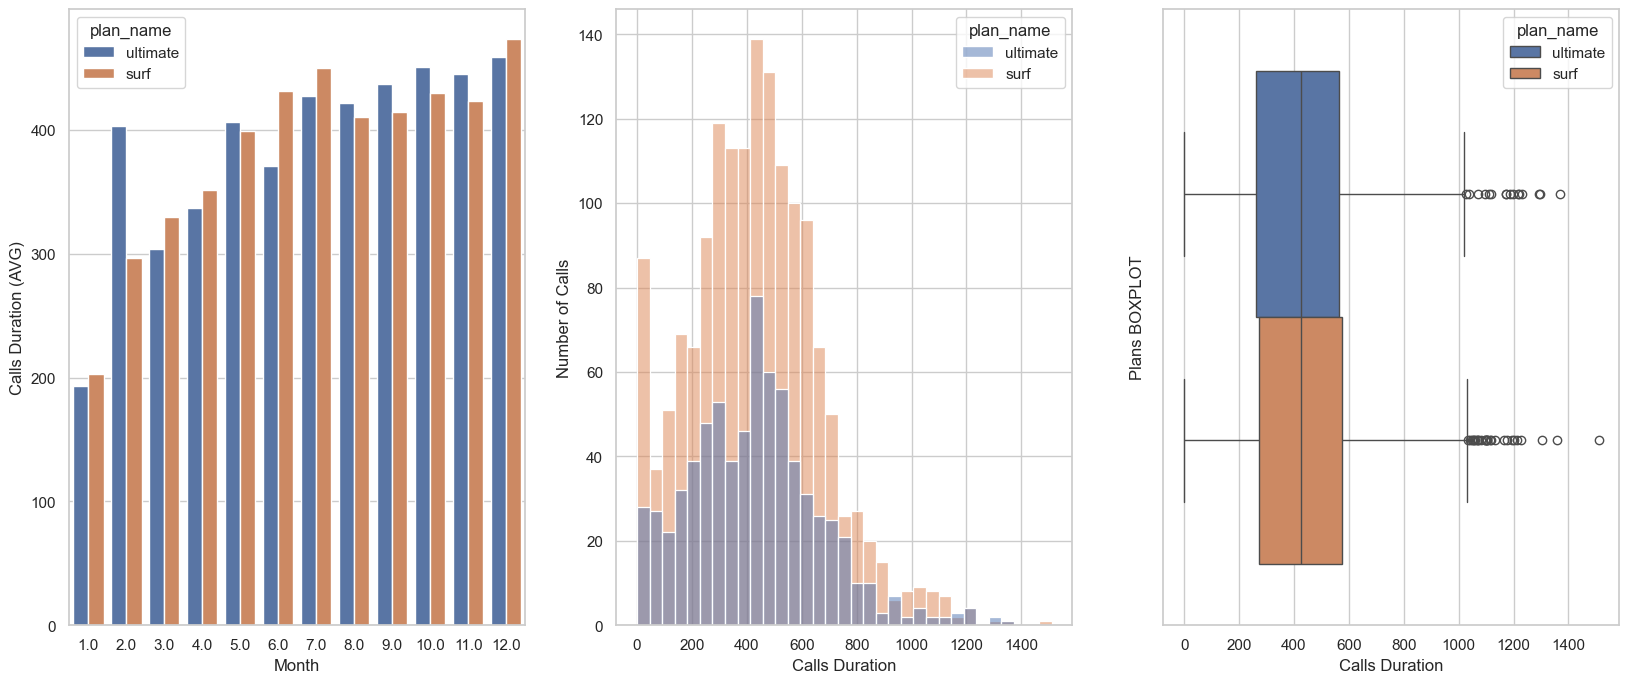

In [71]:
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))

sns.barplot(hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'month_contract', y= 'duration', data = month_duration_avg, ax = ax1);
ax1.set_ylabel("Calls Duration (AVG)");
ax1.set_xlabel("Month");

sns.histplot( hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'duration',  data = general_info, ax = ax2);
ax2.set_ylabel("Number of Calls");
ax2.set_xlabel("Calls Duration");

sns.boxplot( hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'duration', data = general_info, ax = ax3);
ax3.set_ylabel("Plans BOXPLOT");
ax3.set_xlabel("Calls Duration");



<p style = 'color: #40cfff'>O comportamento dos usuários, independente do plano contratado, é muito parecido. Esse comportamento é facilmente percebido através do boxplot (3a fig.), que nos apresenta tempos de duração das chamadas bem semelhantes paras os minimos, quartis e máximos de ambos os planos.</p>

<p style = 'color: #40cfff'>O histograma deixa bem claro que o plano SURF tem mais clientes. </p>

<p style = 'color: orange'>1.13.2  Mensagens</p>

In [72]:
general_info.head()

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_call_value,extra_message_value,extra_internet_value,income_per_client
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.09,70.0,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00


<p style = 'color: #40cfff'>Visão geral</p>

In [73]:
general_info.groupby(['month_contract', 'plan_name'])['messages_count'].describe()

count       mean        std  min    25%   50%  \
month_contract plan_name                                                  
1.0            surf         2.0  10.500000  14.849242  0.0   5.25  10.5   
               ultimate     4.0  15.500000  17.710637  0.0   1.50  12.5   
2.0            surf         9.0  12.000000  19.646883  0.0   0.00   3.0   
               ultimate     7.0  21.571429  21.869744  0.0  10.00  15.0   
3.0            surf        23.0  15.260870  18.616262  0.0   0.00   7.0   
               ultimate    12.0  20.250000  25.580977  0.0   0.00  12.0   
4.0            surf        50.0  17.400000  22.396246  0.0   0.00  10.0   
               ultimate    21.0  22.047619  23.326972  0.0   5.00  17.0   
5.0            surf        77.0  24.012987  29.106652  0.0   0.00  15.0   
               ultimate    29.0  32.103448  36.018195  0.0   0.00  19.0   
6.0            surf        97.0  25.298969  30.247646  0.0   1.00  15.0   
               ultimate    47.0  29.340426  29.285162  0.0   4.50  21.0   
7.0            surf       121.0  27.033058  30.395979  0.0   1.00  20.0   
               ultimate    59.0  32.830508  30.991741  0.0   4.50  28.0   
8.0            surf       162.0  28.777778  32.086064  0.0   2.00  20.0   
               ultimate    71.0  38.478873  34.588544  0.0   6.00  36.0   
9.0            surf       194.0  30.762887  31.683268  0.0   4.00  22.5   
               ultimate    86.0  37.895349  32.417871  0.0   7.25  31.5   
10.0           surf       237.0  33.839662  35.713663  0.0   4.00  26.0   
               ultimate   106.0  39.443396  34.944331  0.0   8.00  35.0   
11.0           surf       283.0  32.385159  32.639608  0.0   4.00  27.0   
               ultimate   127.0  38.606299  35.109389  0.0   8.50  32.0   
12.0           surf       318.0  38.600629  38.185843  0.0   9.00  31.0   
               ultimate   151.0  45.006623  39.362672  0.0   9.50  41.0   

                            75%    max  
month_contract plan_name                
1.0            surf       15.75   21.0  
               ultimate   26.50   37.0  
2.0            surf       11.00   58.0  
               ultimate   24.50   67.0  
3.0            surf       25.00   59.0  
               ultimate   28.00   72.0  
4.0            surf       27.75  120.0  
               ultimate   28.00   77.0  
5.0            surf       37.00  149.0  
               ultimate   60.00  149.0  
6.0            surf       36.00  133.0  
               ultimate   46.50  143.0  
7.0            surf       41.00  164.0  
               ultimate   52.50  149.0  
8.0            surf       43.00  156.0  
               ultimate   64.50  151.0  
9.0            surf       48.00  153.0  
               ultimate   61.00  155.0  
10.0           surf       51.00  224.0  
               ultimate   57.75  153.0  
11.0           surf       47.00  180.0  
               ultimate   63.00  166.0  
12.0           surf       57.00  266.0  
               ultimate   72.00  150.0

<p style = 'color: #40cfff'>Média de mensagens por plano:</p>

In [74]:
messages_avg = general_info.groupby(['month_contract', 'plan_name'])['messages_count'].mean().reset_index()
messages_avg.head()

,month_contract,plan_name,messages_count
0,1.0,surf,10.500000
1,1.0,ultimate,15.500000
2,2.0,surf,12.000000
3,2.0,ultimate,21.571429
4,3.0,surf,15.260870


<p style = 'color: #40cfff'>Análise visual com auxílio de gráficos:</p>

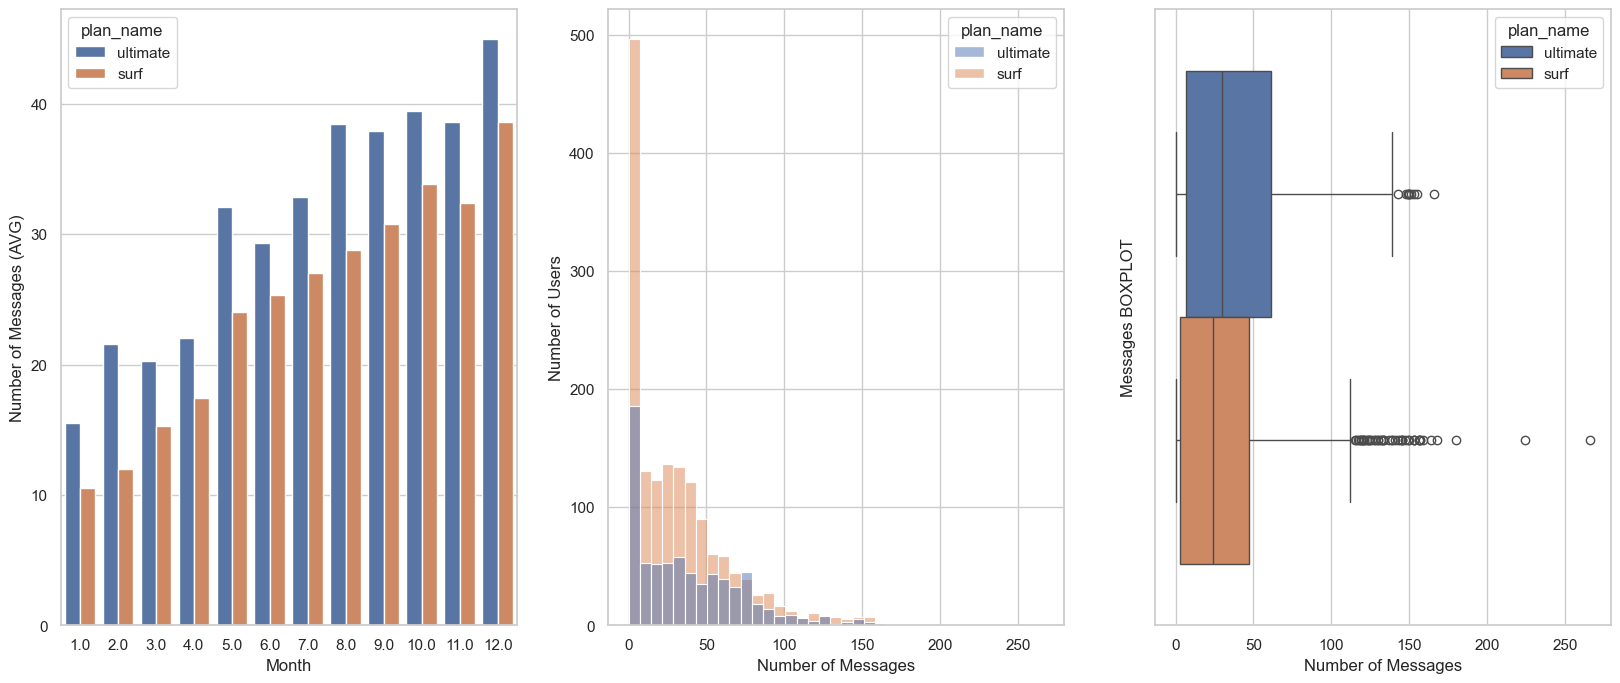

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))

sns.barplot(hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'month_contract', y= 'messages_count', data = messages_avg, ax = ax1);
ax1.set_ylabel("Number of Messages (AVG)");
ax1.set_xlabel("Month");

sns.histplot( hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'messages_count',  data = general_info, ax = ax2);
ax2.set_ylabel("Number of Users");
ax2.set_xlabel("Number of Messages");

sns.boxplot( hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'messages_count', data = general_info, ax = ax3);
ax3.set_ylabel("Messages BOXPLOT");
ax3.set_xlabel("Number of Messages");

<p style = 'color: #40cfff'>O comportamento para o envio de mensagens dos clientes é parecido, independente do plano.</p>

<p style = 'color: #40cfff'>Porém mesmo a média mensal de envio de mensagens do plano SURF sendo maior, percebemos que  isso não se reflete de forma homogenea por esse grupo de usuários. A média está sendo puxada pra cima por 'outliers' e proporcionalmente maior parte dos usuários do plano ULTIMATE tem costume de enviar mais mensagens do que grande parte ds usuários do plano SURF. </p>

<p style = 'color: orange'>1.13.3  Internet</p>

In [76]:
general_info.head()

,user_id,month_contract,calls_count,duration,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_call_value,extra_message_value,extra_internet_value,income_per_client
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.00,0.0,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.09,70.0,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00


<p style = 'color: #40cfff'>Quantidade de tráfego de internet (GB) por cliente:</p>

In [77]:
internet_use = general_info.groupby(['plan_name', 'user_id'])['gb_used'].sum().reset_index()
internet_use

,plan_name,user_id,gb_used
0,surf,1001,81.0
1,surf,1002,41.0
2,surf,1003,27.0
3,surf,1004,157.0
4,surf,1005,17.0
...,...,...,...
495,ultimate,1482,21.0
496,ultimate,1487,14.0
497,ultimate,1490,191.0
498,ultimate,1493,76.0


<p style = 'color: #40cfff'>Média de quantidade de tráfego de internet (GB) por plano:</p>

In [78]:
internet_use.groupby('plan_name')['gb_used'].mean()

plan_name
surf        77.353982
ultimate    77.397516
Name: gb_used, dtype: float64

<p style = 'color: #40cfff'>Análise visual com auxílio de gráficos:</p>

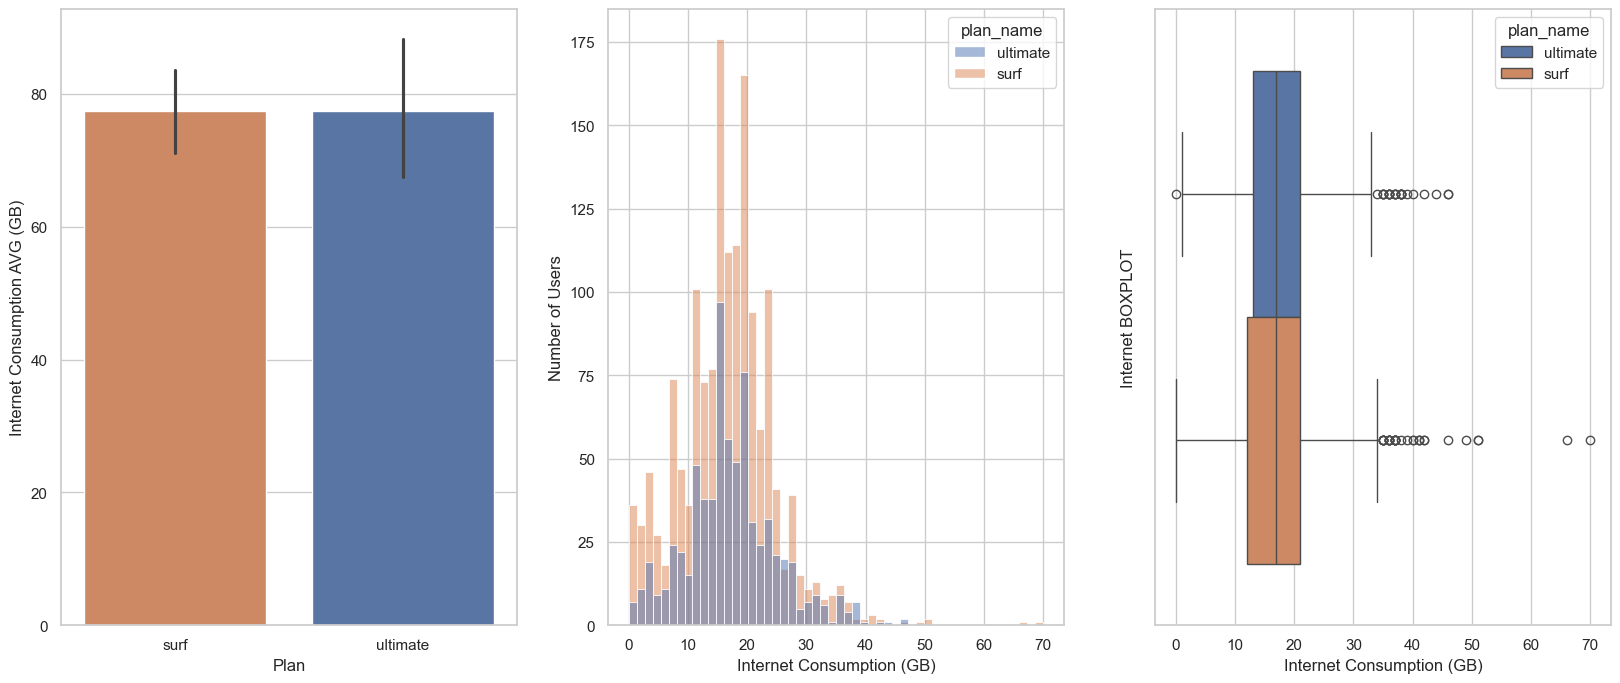

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))

sns.barplot(hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'plan_name', y = 'gb_used', data = internet_use, ax = ax1);
ax1.set_ylabel("Internet Consumption AVG (GB)");
ax1.set_xlabel("Plan");

sns.histplot( hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'gb_used',  data = general_info, ax = ax2);
ax2.set_ylabel("Number of Users");
ax2.set_xlabel("Internet Consumption (GB)");

sns.boxplot( hue = 'plan_name', hue_order = ['ultimate', 'surf'], x = 'gb_used', data = general_info, ax = ax3);
ax3.set_ylabel("Internet BOXPLOT");
ax3.set_xlabel("Internet Consumption (GB)");

<p style = 'color: #40cfff'>O comportamento dos clientes relacionado à utilização de internet dos dois planos é muito parecido.</p>

<h3 style = 'color: orange'>1.14  Receita</h3>

In [80]:
income_df.head()

,user_id,plan_name,month_contract,income_per_client
0,1000,ultimate,12.0,70.00
1,1001,surf,8.0,20.00
2,1001,surf,9.0,20.00
3,1001,surf,10.0,90.09
4,1001,surf,11.0,60.00


<p style = 'color: #40cfff'>Receita média por planos:</p>

In [81]:
income_df.groupby('plan_name')['income_per_client'].mean().reset_index()

,plan_name,income_per_client
0,surf,60.706408
1,ultimate,72.313889


<p style = 'color: #40cfff'>Análise visual com auxílio de gráficos:</p>

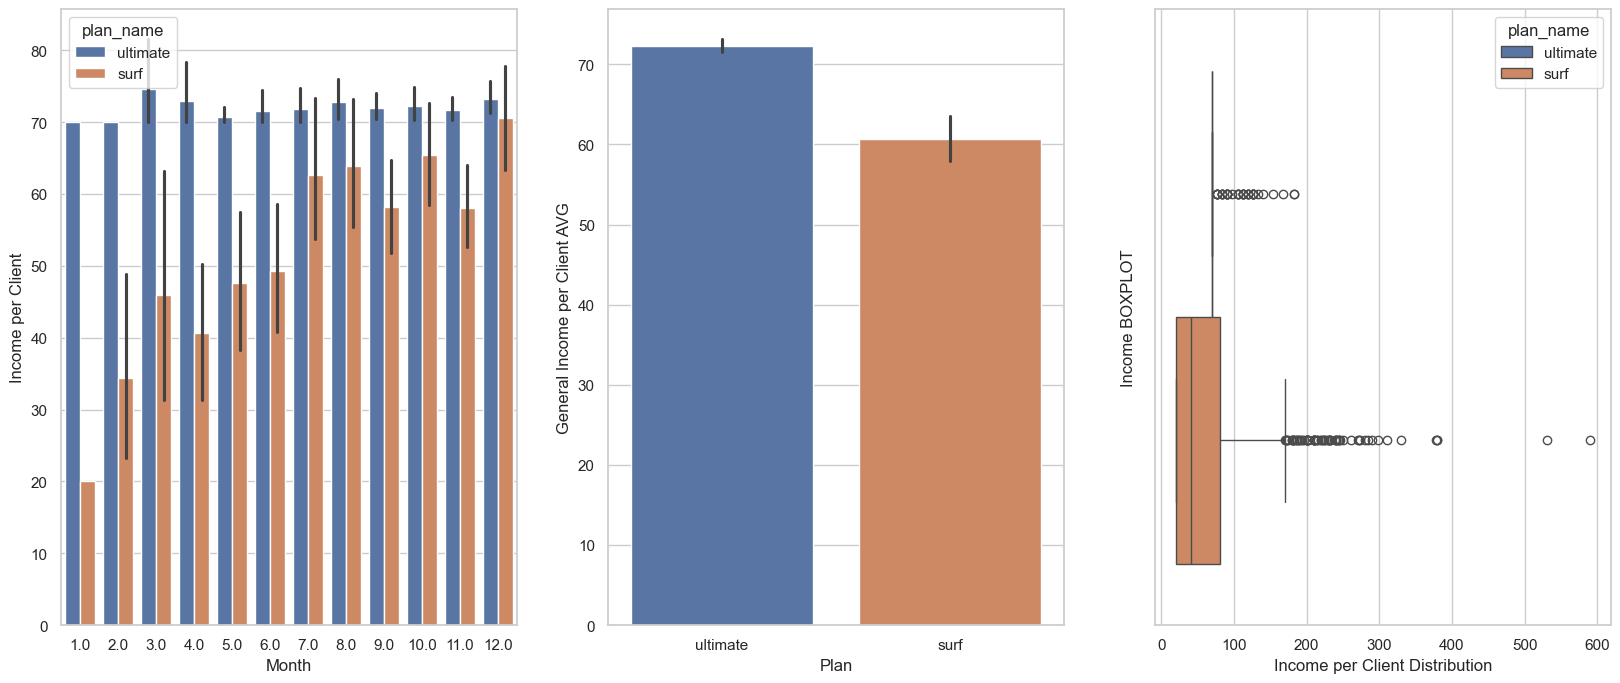

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))

sns.barplot(hue = 'plan_name', x = 'month_contract', y= 'income_per_client', data = income_df, hue_order = ['ultimate', 'surf'], ax = ax1);
ax1.set_ylabel("Income per Client");
ax1.set_xlabel("Month");

sns.barplot( hue = 'plan_name', x = 'plan_name', y= 'income_per_client',  data = income_df, hue_order = ['ultimate', 'surf'], ax = ax2);
ax2.set_ylabel("General Income per Client AVG");
ax2.set_xlabel("Plan");

sns.boxplot( hue = 'plan_name', x= 'income_per_client',  data = income_df, hue_order = ['ultimate', 'surf'], ax = ax3);
ax3.set_ylabel("Income BOXPLOT");
ax3.set_xlabel("Income per Client Distribution");

<p style = 'color: #40cfff'>Analisando os graficos e os números, percebo que o plano ULTIMATE apresenta uma receita média superior. Toda sua distribuição está praticamente concentrada no valor da receita média (com excessão de alguns outliers).</p>

<h3 style = 'color: orange'>1.15  Teste hipóteses estatísticas</h3>

<p style = 'color: orange'>Teste de hipóteses (Receitas/Planos) h0 e h1:<br/>
<br/>
Hípotese h0 - A média das receitas dos planos são iguais
</p>

In [83]:
income_df.head()

,user_id,plan_name,month_contract,income_per_client
0,1000,ultimate,12.0,70.00
1,1001,surf,8.0,20.00
2,1001,surf,9.0,20.00
3,1001,surf,10.0,90.09
4,1001,surf,11.0,60.00


<p style = 'color: #40cfff'>Obtendo informações sobre as variancias para 'ttest':</p>

In [84]:
ultimate_incomes = income_df[income_df['plan_name'] == 'ultimate']
ultimate_incomes = np.array(ultimate_incomes['income_per_client'])
np.var(ultimate_incomes)

129.66814043209877

In [85]:
surf_incomes = income_df[income_df['plan_name'] == 'surf']
surf_incomes = np.array(surf_incomes['income_per_client'])
np.var(surf_incomes)

3065.8848438690247

 <p style = 'color: #40cfff'>Hipótese sobre a igualdade das médias de duas populações:</p>

In [86]:
alpha = 0.05

results = st.ttest_ind(ultimate_incomes, surf_incomes, equal_var = False )

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 3.1703905481135738e-15
Rejeitamos a hipótese nula


 <p style = 'color: #40cfff'>A hipótese nula foi rejeitada, as médias são realmente diferentes.</p>

<p style = 'color: orange'>Hípotese h1 - A média das receitas do plano ULTIMATE é maior do que a do plano SURF:
</p>

In [87]:
alpha = 0.05

surf_incomes_avg = 60.706408

results = st.ttest_1samp(ultimate_incomes, surf_incomes_avg)

print('valor-p: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (ultimate_incomes.mean() > surf_incomes_avg):
    print("Rejeitamos a hipótese nula, a média da receita de ULTIMATE é significativamente maior.")
else:
    print("Não podemos rejeitar a hipótese nula")


valor-p:  1.1960502116099937e-113
Rejeitamos a hipótese nula, a média da receita de ULTIMATE é significativamente maior.


 <p style = 'color: #40cfff'>A média da receita de ULTIMATE é realmente maior.</p>

<p style = 'color: orange'>Teste de hipóteses (Receitas/Cidades) h0 e h1:<br/>
<br/>
Hípotese h0 - A receita média dos usuários da área de NY-NJ é igual a dos usuários das demais regiões.
</p>

In [88]:
users

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,cliente ativo,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,cliente ativo,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,cliente ativo,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,cliente ativo,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,cliente ativo,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,cliente ativo,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,cliente ativo,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,cliente ativo,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,cliente ativo,0


 <p style = 'color: #40cfff'>Criando um DataFrame com os dados de 'incomes' e 'city':</p>

In [89]:
user_id_city = users[['user_id', 'city']]
user_id_city.head()

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"


In [90]:
income_df_city = income_df.merge(user_id_city, how= 'left', on= 'user_id')
income_df_city.head()

,user_id,plan_name,month_contract,income_per_client,city
0,1000,ultimate,12.0,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,8.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,surf,9.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,surf,10.0,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,surf,11.0,60.00,"Seattle-Tacoma-Bellevue, WA MSA"


 <p style = 'color: #40cfff'>Separando os grupos que serão analisados e obtendo suas variancias:</p>

In [91]:
ny_nj_incomes = income_df[income_df_city['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
ny_nj_incomes = np.array(ny_nj_incomes['income_per_client'])
np.var(ny_nj_incomes)

1890.5177172681156

In [92]:
other_cities_incomes = income_df[income_df_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_cities_incomes = np.array(other_cities_incomes['income_per_client'])
np.var(other_cities_incomes)

2223.8866958162175

 <p style = 'color: #40cfff'>Hipótese sobre a igualdade das médias de duas populações:</p>

In [93]:
alpha = 0.05

results = st.ttest_ind(ny_nj_incomes, other_cities_incomes, equal_var = False )

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 0.0335256158853001
Rejeitamos a hipótese nula


<p style = 'color: #40cfff'>A hipótese nula não foi rejeitada, não podemos dizer que a receita média das populações analisadas são diferentes. </p>

<p style = 'color: orange'>Hípotese h1 - A média das receitas de NY-NJ é maior do que a das demais regiões:
</p>

In [94]:
other_cities_incomes.mean()

65.2227713987474

In [97]:
alpha = 0.05

other_cities_incomes_avg = other_cities_incomes.mean()

results = st.ttest_1samp(ny_nj_incomes, other_cities_incomes_avg)

print('valor-p: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (ny_nj_incomes.mean() > other_cities_incomes_avg):
    print("Rejeitamos a hipótese nula, A média das receitas de NY-NJ é maior do que a das demais regiões.")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.00928676557149959
Não podemos rejeitar a hipótese nula


<p style = 'color: #40cfff'>A hipótese nula não foi rejeitada, não podemos dizer que a receita média de NY-NJ é maior do que a das demais regiões. </p>

<h3 style = 'color: orange'>EXTRA. Uma última análise sobre o percentual de cancelamento em cada plano:</h3>

In [95]:
users.groupby('plan_name')['churned'].mean()

plan_name
surf        0.067847
ultimate    0.068323
Name: churned, dtype: float64

<h3 style = 'color: orange'>1.16  Conclusão geral</h3>

<p style = 'color: #40cfff'>Após descartarmos a hipótese nula sobre a diferença de receitas médias dos planos ULTIMATE  e SURF, podemos dizer que o plano ULTIMATE gera proporcionalmente mais receitas para a empresa.<br/>
<br/>
A análise comportamental dos usuários apresentou uma utilização geral dos serviços muito parecida. Podemos observar que independente dos pacotes do plano ULTIMATE oferecerem limites maiores, isso não faz com que seus usuários tenham consumos consideravelmente maiores do que a média geral.
Os contratantes do plano SURF tem um custo final consideravelmente maior que o custo contratado, enquanto os contratantes do plano ULTIMATE se mantêm bem próximos do valor inicialmente contratado.<br/>
<br/>
Foi verificado também que o percentual de cancelamentos é igual para ambos os planos. Isso não evidencia nenhuma tendência de insatisfação em qualquer um dos grupos de clientes.<br/>
<br/>
Acredito que o departamento de marketing da empresa deve priorizar o plano ULTIMATE. A expansão de sua base de clientes nesse plano aumentará a receita da empresa.</p>
